# Pumpkin seed classification project using supervised learning ML algorithms

## 1. Import Lybraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import timeit
#sklearn lybraries
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#more sklearn lybraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

## 2. Import Dataset

In [18]:
import os
import pandas as pd

relative_path = './Dataset/seed_dataset.xlsx'  # Adjust this if your file is in a different location

# Check if the file exists (optional debugging step)
if not os.path.exists(relative_path):
    print(f"File not found: {relative_path}")
else:
    print(f"File exists: {relative_path}")

File exists: ./Dataset/seed_dataset.xlsx


In [19]:
#file_path = "C:/Users/Utilizador/GoogleDrive/Portfolio/Project_Pumpkin_Seed_Classification/Dataset/seed_dataset.xlsx"
df = pd.read_excel(relative_path)
df.head()

Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0  56276    888.242           326.1485           220.2388        56831   
1  76631   1068.146           417.1932           234.2289        77280   
2  71623   1082.987           435.8328           211.0457        72663   
3  66458    992.051           381.5638           222.5322        67118   
4  66107    998.146           383.8883           220.4545        67117   

   Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  Aspect_Ration  \
0        267.6805        0.7376    0.9902  0.7453     0.8963         1.4809   
1        312.3614        0.8275    0.9916  0.7151     0.8440         1.7811   
2        301.9822        0.8749    0.9857  0.7400     0.7674         2.0651   
3        290.8899        0.8123    0.9902  0.7396     0.8486         1.7146   
4        290.1207        0.8187    0.9850  0.6752     0.8338         1.7413   

   Compactness       Class  
0       0.8207  Çerçevelik  
1       0.7487  Çerçevelik  
2       0.6929  Çerçevelik  
3       0.7624  Çerçevelik  
4       0.7557  Çerçevelik

## 3. Looking into the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [4]:
#Checking for NaNs in the data
df.isna().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64

In [5]:
df['Class'].describe()

count           2500
unique             2
top       Çerçevelik
freq            1300
Name: Class, dtype: object

In [6]:
df['Class'].unique()

array(['Çerçevelik', 'Ürgüp Sivrisi'], dtype=object)

## 4. Exploring data trends

### 4.1. Data distribution

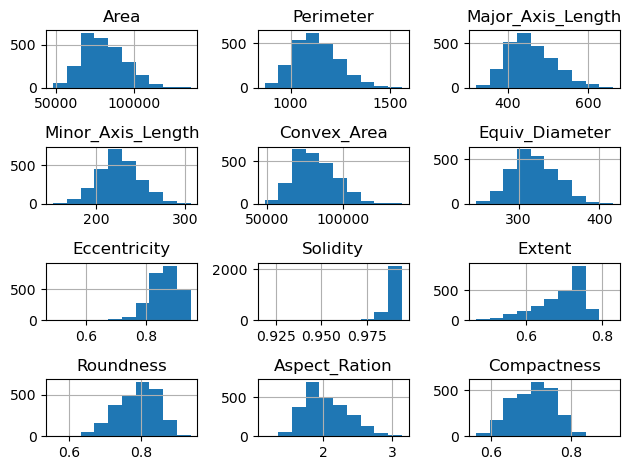

In [7]:
df.hist()
plt.tight_layout()
plt.show()

In [8]:
df.describe()

Area    Perimeter  Major_Axis_Length  Minor_Axis_Length  \
count    2500.000000  2500.000000        2500.000000        2500.000000   
mean    80658.220800  1130.279015         456.601840         225.794921   
std     13664.510228   109.256418          56.235704          23.297245   
min     47939.000000   868.485000         320.844600         152.171800   
25%     70765.000000  1048.829750         414.957850         211.245925   
50%     79076.000000  1123.672000         449.496600         224.703100   
75%     89757.500000  1203.340500         492.737650         240.672875   
max    136574.000000  1559.450000         661.911300         305.818000   

         Convex_Area  Equiv_Diameter  Eccentricity     Solidity       Extent  \
count    2500.000000     2500.000000   2500.000000  2500.000000  2500.000000   
mean    81508.084400      319.334230      0.860879     0.989492     0.693205   
std     13764.092788       26.891920      0.045167     0.003494     0.060914   
min     48366.000000      247.058400      0.492100     0.918600     0.468000   
25%     71512.000000      300.167975      0.831700     0.988300     0.658900   
50%     79872.000000      317.305350      0.863700     0.990300     0.713050   
75%     90797.750000      338.057375      0.897025     0.991500     0.740225   
max    138384.000000      417.002900      0.948100     0.994400     0.829600   

         Roundness  Aspect_Ration  Compactness  
count  2500.000000    2500.000000  2500.000000  
mean      0.791533       2.041702     0.704121  
std       0.055924       0.315997     0.053067  
min       0.554600       1.148700     0.560800  
25%       0.751900       1.801050     0.663475  
50%       0.797750       1.984200     0.707700  
75%       0.834325       2.262075     0.743500  
max       0.939600       3.144400     0.904900

### 4.2. Class distribution: is the dataset balanced?

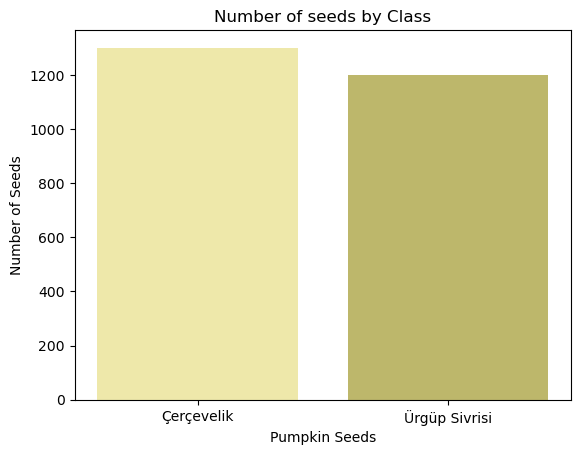

In [9]:
#ploting distribution of the two type of classifiers
plt.bar(df['Class'].value_counts().index,df['Class'].value_counts(), color=['palegoldenrod', 'darkkhaki'])
plt.xlabel('Pumpkin Seeds')
plt.ylabel('Number of Seeds')
plt.title('Number of seeds by Class')
plt.show()

### 4.3 Ploting a boxplot with the normalized distribution of the features in the dataset

In [10]:
df_norm = df.drop(['Class'], axis=1)

x = df_norm.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

df_norm = pd.DataFrame(x_scaled)

In [11]:
df_x = df.drop(['Class'], axis=1)
df_norm.columns =df_x.columns
df_norm
df_norm.head()

Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0  0.094060   0.028593           0.015551           0.443011     0.094037   
1  0.323710   0.288960           0.282492           0.534065     0.321202   
2  0.267208   0.310438           0.337143           0.383178     0.269913   
3  0.208936   0.178831           0.178027           0.457938     0.208314   
4  0.204975   0.187652           0.184843           0.444415     0.208303   

   Equiv_Diameter  Eccentricity  Solidity    Extent  Roundness  Aspect_Ration  \
0        0.121346      0.538377  0.944591  0.766869   0.887532       0.166458   
1        0.384261      0.735526  0.963061  0.683352   0.751688       0.316881   
2        0.323187      0.839474  0.885224  0.752212   0.552727       0.459187   
3        0.257917      0.702193  0.944591  0.751106   0.763636       0.283560   
4        0.253390      0.716228  0.875989  0.573009   0.725195       0.296938   

   Compactness  
0     0.755304  
1     0.546062  
2     0.383900  
3     0.585876  
4     0.566405

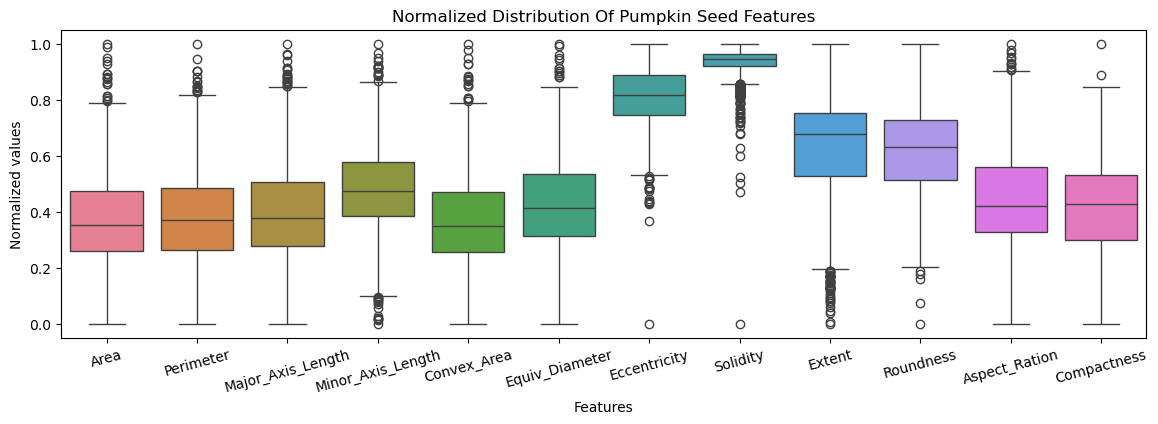

In [12]:
plt.figure(figsize=(14, 4))
sns.boxplot(data=df_norm)
plt.xticks(rotation=15, fontsize=10)
plt.xlabel('Features')
plt.ylabel('Normalized values')
plt.title('Normalized Distribution Of Pumpkin Seed Features')
plt.show()

### 4.4. Correlation between pairs of variables

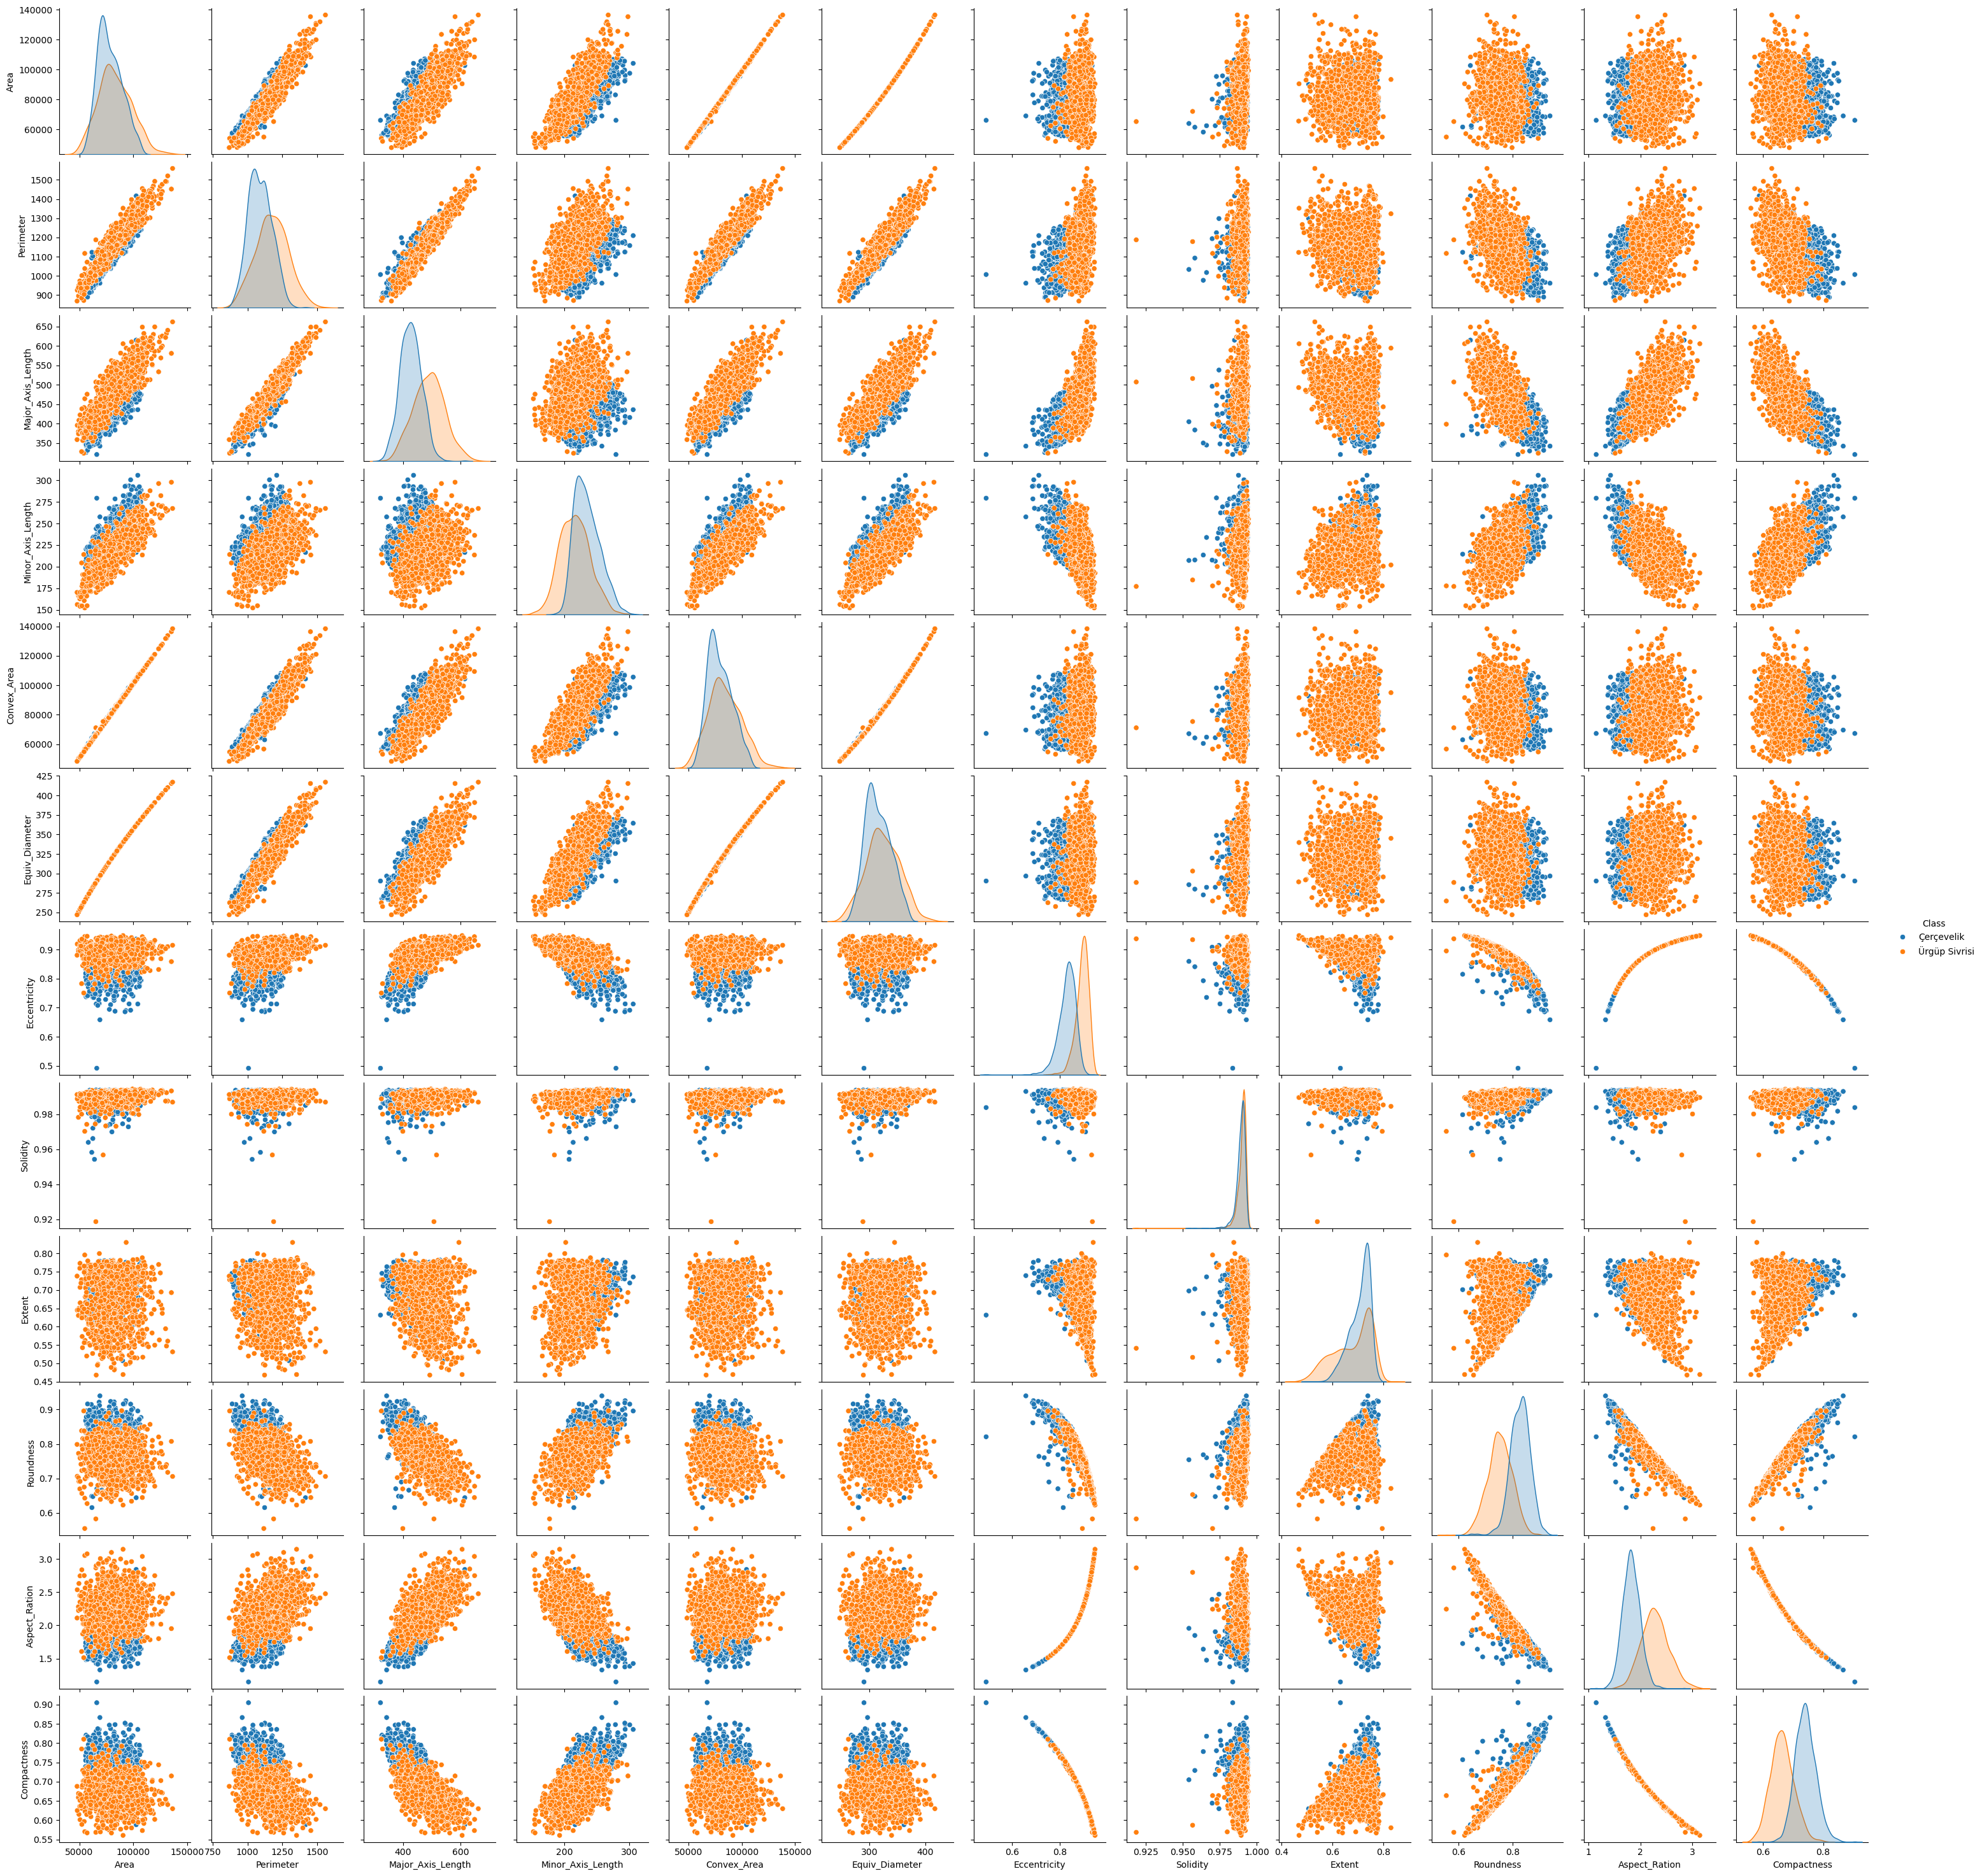

In [13]:
df_pair = df 
sns.pairplot(df_pair,hue="Class")
plt.show()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0.5, 0, 'Area'),
  Text(1.5, 0, 'Perimeter'),
  Text(2.5, 0, 'Major_Axis_Length'),
  Text(3.5, 0, 'Minor_Axis_Length'),
  Text(4.5, 0, 'Convex_Area'),
  Text(5.5, 0, 'Equiv_Diameter'),
  Text(6.5, 0, 'Eccentricity'),
  Text(7.5, 0, 'Solidity'),
  Text(8.5, 0, 'Extent'),
  Text(9.5, 0, 'Roundness'),
  Text(10.5, 0, 'Aspect_Ration'),
  Text(11.5, 0, 'Compactness')])

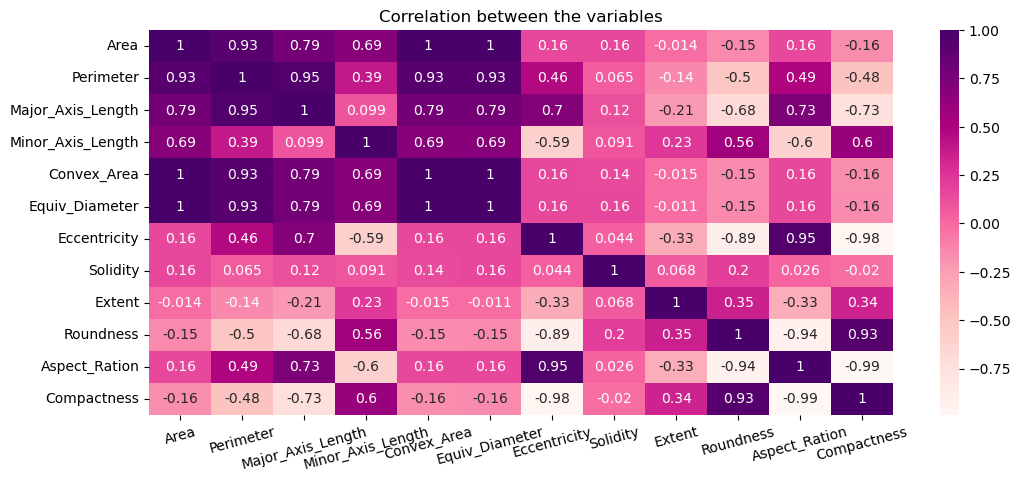

In [14]:
#ploting a heat map to visualize correlation
plt.subplots(figsize=(12,5))
gender_correlation=df_x.corr()
sns.heatmap(gender_correlation,annot=True,cmap='RdPu')
plt.title('Correlation between the variables')
plt.xticks(rotation=15)

## 5.  Model Training

### 5.1 Data Pre-processing

### Enconding target variable

In [15]:
#using a new df_
df_=pd.get_dummies(df, columns=['Class'])
df_.head()

Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0  56276    888.242           326.1485           220.2388        56831   
1  76631   1068.146           417.1932           234.2289        77280   
2  71623   1082.987           435.8328           211.0457        72663   
3  66458    992.051           381.5638           222.5322        67118   
4  66107    998.146           383.8883           220.4545        67117   

   Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  Aspect_Ration  \
0        267.6805        0.7376    0.9902  0.7453     0.8963         1.4809   
1        312.3614        0.8275    0.9916  0.7151     0.8440         1.7811   
2        301.9822        0.8749    0.9857  0.7400     0.7674         2.0651   
3        290.8899        0.8123    0.9902  0.7396     0.8486         1.7146   
4        290.1207        0.8187    0.9850  0.6752     0.8338         1.7413   

   Compactness  Class_Çerçevelik  Class_Ürgüp Sivrisi  
0       0.8207              True                False  
1       0.7487              True                False  
2       0.6929              True                False  
3       0.7624              True                False  
4       0.7557              True                False

In [16]:
#For simplicity, lets make the target one single column Class_Çerçevelik
df_ = df_.drop(['Class_Ürgüp Sivrisi'], axis = 1)

In [17]:
# Enconding: Çerçevelik = 1 and Ürgüp Sivrisi = 0
df_['Class_Çerçevelik'] = df_['Class_Çerçevelik'].astype(int)
df_.head()

Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0  56276    888.242           326.1485           220.2388        56831   
1  76631   1068.146           417.1932           234.2289        77280   
2  71623   1082.987           435.8328           211.0457        72663   
3  66458    992.051           381.5638           222.5322        67118   
4  66107    998.146           383.8883           220.4545        67117   

   Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  Aspect_Ration  \
0        267.6805        0.7376    0.9902  0.7453     0.8963         1.4809   
1        312.3614        0.8275    0.9916  0.7151     0.8440         1.7811   
2        301.9822        0.8749    0.9857  0.7400     0.7674         2.0651   
3        290.8899        0.8123    0.9902  0.7396     0.8486         1.7146   
4        290.1207        0.8187    0.9850  0.6752     0.8338         1.7413   

   Compactness  Class_Çerçevelik  
0       0.8207                 1  
1       0.7487                 1  
2       0.6929                 1  
3       0.7624                 1  
4       0.7557                 1

In [18]:
#defining features (X) and target (y) variables
X = df_.drop(['Class_Çerçevelik'], axis=1)
y = df_['Class_Çerçevelik']

### Spliting data in train and test sets

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [20]:
print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (1750, 12)
x_test:  (750, 12)
y_train:  (1750,)
y_test:  (750,)


### Data Normalization

In [21]:
#min_max_scaler = preprocessing.MinMaxScaler() #using default range [0,1]
#min_max_scaler was already defined earlier

x_train_scaled = min_max_scaler.fit_transform(x_train)
x_test_scaled = min_max_scaler.fit_transform(x_test)
#target variable is enconded as 0 and 1 so no need for normalization

In [22]:
y_test.value_counts()

Class_Çerçevelik
1    389
0    361
Name: count, dtype: int64

In [23]:
y_train.value_counts()

Class_Çerçevelik
1    911
0    839
Name: count, dtype: int64

In [24]:
df["Class"].value_counts()

Class
Çerçevelik       1300
Ürgüp Sivrisi    1200
Name: count, dtype: int64

In [25]:
print("data class ratio", 1300/1200)
print("train class ratio: ", 389/361)
print("test class ratio: ", 911/839)

data class ratio 1.0833333333333333
train class ratio:  1.077562326869806
test class ratio:  1.0858164481525625


In [26]:
#the test and train sets maintains the initial data class ratio

### 5.2 Model Deployment

In [27]:
#lets define a function to estimate specificity
def specificity(clf,cm):
  #cm is the confusion matrix
  FP = cm.sum(axis=0) - np.diag(cm)  #vector with nr of false positives of each label
  FN = cm.sum(axis=1) - np.diag(cm) #vector with nr of false negatives of each label
  TP = np.diag(cm) #vector with nr of true positives of each label
  TN = cm.sum() - (FP + FN + TP) #vector with nr of true negatives of each label

  FP = FP.astype(float)
  TN = TN.astype(float)
  
  sp = TN/(TN+FP) #vector with specificity of each label
  sp_mean = np.mean(sp)
  labels=clf.classes_
  res = "\n".join("{:>25} "     " {}".format(x, y) for x, y in zip(labels, sp))
  print(res)
  print('\nmacro avg:', sp_mean)

#let's define a function for model classification
def print_score(classifier,X_test,y_test):
  print("Test results:\n")
  print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
  print('Balanced Accuracy Score: {0:.4f}\n'.format(balanced_accuracy_score(y_test,classifier.predict(X_test))))
  print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
  print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))
  print("Specificity:\n") 
  print(specificity(classifier,confusion_matrix(y_test,classifier.predict(X_test))))

#lets create a score array with diferent scoring parameters to use on grid evlauation
score=['accuracy','f1_micro','recall','precision','roc_auc']

#### 5.2.1 Binary Logistic Regression

In [28]:
log_reg = LogisticRegression(max_iter=5000)

In [29]:
#Grid Search
# Defining a dictionary with parameters for grid search
parameters = {
    #'C':[0.0001, 0.001, 0.01, 1],
    'C':np.logspace(-4, 4, 20),
    'solver':['lbfgs', 'liblinear'],
    'class_weight':['balanced', None]
}

#creating a grid search object for log_reg
log_reg_cv_a = GridSearchCV(estimator=log_reg, param_grid=parameters, cv=10, scoring=score[0])

In [30]:
#fiting the training data: performing grid search on the model
grid_search_a = log_reg_cv_a.fit(x_train_scaled, y_train)

In [31]:
pd.DataFrame(grid_search_a.cv_results_)[['params','rank_test_score','mean_test_score','std_test_score']];

In [32]:
print("Best parameters : ", log_reg_cv_a.best_params_)

Best parameters :  {'C': 3792.690190732246, 'class_weight': None, 'solver': 'liblinear'}


In [33]:
# Defining a dictionlary with possible parameters for performing grid search
parameters = {
    'C':np.logspace(-4, 4, 20),
    'solver': ['liblinear'],
    'class_weight':[ None]
}

gs_b= GridSearchCV(LogisticRegression(), parameters, cv=7, scoring=score[0])
grid_search_b=gs_b.fit(x_train_scaled, y_train)

Text(0.5, 1.0, 'Logistic Regression Classifier for different regularization values')

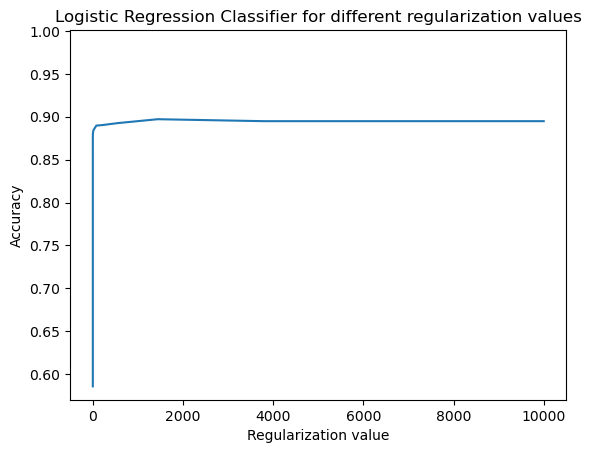

In [34]:
plt.plot(np.logspace(-4, 4, 20), grid_search_b.cv_results_['mean_test_score'])
plt.ylim(top=1.001) 
plt.xlabel('Regularization value')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Classifier for different regularization values')

In [35]:
#Creating a logistic regression object using the optimized parameters
log_reg_best = LogisticRegression(C=1, class_weight = None, solver = 'lbfgs', max_iter=5000)

start = timeit.default_timer()
log_reg_best.fit(x_train, y_train)
stop = timeit.default_timer()

print("running time: ", stop-start)
print_score(log_reg_best, x_test, y_test)

running time:  0.20143069999176078
Test results:

Accuracy Score: 0.8573

Balanced Accuracy Score: 0.8558

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.85       361
           1       0.84      0.90      0.87       389

    accuracy                           0.86       750
   macro avg       0.86      0.86      0.86       750
weighted avg       0.86      0.86      0.86       750


Confusion Matrix:
[[294  67]
 [ 40 349]]

Specificity:

                        0  0.897172236503856
                        1  0.814404432132964

macro avg: 0.8557883343184101
None


#### 5.2.2 k-nearest Neighbors (KNN)

In [36]:
knn = KNeighborsClassifier()

In [37]:
parameters = {
    'n_neighbors': list(range(1, 200, 10)),
    'metric':['euclidean','manhattan']
}

#creating a grid search object on knn estimator
knn_cv = GridSearchCV(estimator=knn, param_grid= parameters, scoring=score[0], cv=10)

In [38]:
#fiting the training data: performing grid search on the model
knn_cv.fit(x_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91,
                                         101, 111, 121, 131, 141, 151, 161, 171,
                                         181, 191]},
             scoring='accuracy')

In [148]:
print("Best parameters : ", knn_cv.best_params_)
print("Best score : ", knn_cv.best_score_)

Best parameters :  {'metric': 'manhattan', 'n_neighbors': 11}
Best score :  0.8937142857142858


In [40]:
#Creating a knn object using the optimized parameters

knn_best = KNeighborsClassifier(metric = 'manhattan', n_neighbors=1)

start = timeit.default_timer()
knn_best.fit(x_train_scaled, y_train)
stop = timeit.default_timer()

print("running time: ", stop-start)
print_score(knn_best, x_test_scaled, y_test)

running time:  0.005604300007689744
Test results:

Accuracy Score: 0.8040

Balanced Accuracy Score: 0.7993

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.67      0.77       361
           1       0.75      0.93      0.83       389

    accuracy                           0.80       750
   macro avg       0.82      0.80      0.80       750
weighted avg       0.82      0.80      0.80       750


Confusion Matrix:
[[243 118]
 [ 29 360]]

Specificity:

                        0  0.9254498714652957
                        1  0.6731301939058172

macro avg: 0.7992900326855564
None


In [41]:
#Repeating grid search, this time using diferent evaluation parameters (score[]) of cross validation trying to increase performance
parameters = {
    'n_neighbors': list(range(1, 200, 10)),
    'metric':['euclidean','manhattan']
}

# Perform separate grid searches for each metric
for metric in score:
    print(f"Optimizing for {metric}")
    grid = GridSearchCV(estimator=knn, param_grid=parameters, scoring=metric, cv=10)
    grid.fit(x_train_scaled, y_train)
    print(f"Best parameters for {metric}: {grid.best_params_}")
    print(f"Best score for {metric}: {grid.best_score_}")

Optimizing for accuracy
Best parameters for accuracy: {'metric': 'manhattan', 'n_neighbors': 11}
Best score for accuracy: 0.8937142857142858
Optimizing for f1_micro
Best parameters for f1_micro: {'metric': 'manhattan', 'n_neighbors': 11}
Best score for f1_micro: 0.8937142857142858
Optimizing for recall
Best parameters for recall: {'metric': 'euclidean', 'n_neighbors': 171}
Best score for recall: 0.9429049211657908
Optimizing for precision
Best parameters for precision: {'metric': 'manhattan', 'n_neighbors': 11}
Best score for precision: 0.8794522209801059
Optimizing for roc_auc
Best parameters for roc_auc: {'metric': 'euclidean', 'n_neighbors': 101}
Best score for roc_auc: 0.9441253890039716


In [42]:
#Creating a knn object using the optimized parameters based on best recall
knn_best = KNeighborsClassifier(metric = 'euclidean', n_neighbors=171)

start = timeit.default_timer()
knn_best.fit(x_train_scaled, y_train)
stop = timeit.default_timer()

print("running time: ", stop-start)
print_score(knn_best, x_test_scaled, y_test)

running time:  0.005701499991118908
Test results:

Accuracy Score: 0.8373

Balanced Accuracy Score: 0.8332

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.72      0.81       361
           1       0.79      0.94      0.86       389

    accuracy                           0.84       750
   macro avg       0.85      0.83      0.83       750
weighted avg       0.85      0.84      0.83       750


Confusion Matrix:
[[261 100]
 [ 22 367]]

Specificity:

                        0  0.9434447300771208
                        1  0.7229916897506925

macro avg: 0.8332182099139067
None


In [43]:
#Creating a knn object using the optimized parameters based on roc auc
knn_best = KNeighborsClassifier(metric = 'euclidean', n_neighbors=101)

start = timeit.default_timer()
knn_best.fit(x_train_scaled, y_train)
stop = timeit.default_timer()

print("running time: ", stop-start)
print_score(knn_best, x_test_scaled, y_test)

running time:  0.006445200007874519
Test results:

Accuracy Score: 0.8373

Balanced Accuracy Score: 0.8334

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.73      0.81       361
           1       0.79      0.94      0.86       389

    accuracy                           0.84       750
   macro avg       0.85      0.83      0.83       750
weighted avg       0.85      0.84      0.84       750


Confusion Matrix:
[[263  98]
 [ 24 365]]

Specificity:

                        0  0.9383033419023136
                        1  0.7285318559556787

macro avg: 0.8334175989289961
None


#### 5.2.3 Support Vector Machine (SVM)

In [44]:
svm = SVC()

In [45]:
parameters = {
    'C': np.logspace(-4, -1, 4),
    'kernel' : ['linear', 'poly'],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1]
}

gs_sv= GridSearchCV(svm, param_grid = parameters, cv=5, scoring=score[0], return_train_score=False,verbose=1)

In [46]:
svm_cv = gs_sv.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [147]:
print(svm_cv.best_params_)
print(svm_cv.best_score_)

{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}
0.8942857142857144


In [59]:
#fiting the best paramenters
svm_best = SVC(C=0.1, gamma=1, kernel= 'poly')

start = timeit.default_timer()
svm_best.fit(x_train_scaled, y_train)
stop = timeit.default_timer()

print('Time: ', stop - start) 
print_score(svm_best, x_test_scaled, y_test)

Time:  0.07659650000277907
Test results:

Accuracy Score: 0.8187

Balanced Accuracy Score: 0.8123

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.64      0.77       361
           1       0.75      0.98      0.85       389

    accuracy                           0.82       750
   macro avg       0.86      0.81      0.81       750
weighted avg       0.85      0.82      0.81       750


Confusion Matrix:
[[232 129]
 [  7 382]]

Specificity:

                        0  0.9820051413881749
                        1  0.6426592797783933

macro avg: 0.8123322105832841
None




#### 5.2.4 Random Forest

In [48]:
random_f = RandomForestClassifier()

In [49]:
parameters={
    'max_depth':np.linspace(1,10,10).astype(int),
    'n_estimators': [1, 2, 4, 10, 30, 100, 300], #[1, 2, 4, 10, 30, 100, 300],
    'criterion': ['gini'] #['gini', 'entropy']
}

score=['accuracy','f1_micro','recall','precision','roc_auc']
random_f_cv= GridSearchCV(estimator = random_f, param_grid = parameters, cv=5, scoring=score[0], return_train_score=False,verbose=1)

In [149]:
start = timeit.default_timer()
grid = random_f_cv.fit(x_train_scaled, y_train)
stop = timeit.default_timer()

Fitting 5 folds for each of 70 candidates, totalling 350 fits


In [150]:
pd.DataFrame(grid.cv_results_)[['params','rank_test_score','mean_test_score','std_test_score']];

In [151]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'max_depth': 9, 'n_estimators': 30}
0.9017142857142858


In [53]:
#Creating a RandomForestClassifier object using the optimized parameters
randomF_best = RandomForestClassifier(max_depth=9,n_estimators=30)

start = timeit.default_timer()
randomF_best.fit(x_train, y_train)
stop = timeit.default_timer()

print('Time: ', stop - start)
print_score(randomF_best, x_test, y_test)

Time:  0.3613323999743443
Test results:

Accuracy Score: 0.8600

Balanced Accuracy Score: 0.8584

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       361
           1       0.84      0.90      0.87       389

    accuracy                           0.86       750
   macro avg       0.86      0.86      0.86       750
weighted avg       0.86      0.86      0.86       750


Confusion Matrix:
[[294  67]
 [ 38 351]]

Specificity:

                        0  0.9023136246786633
                        1  0.814404432132964

macro avg: 0.8583590284058136
None


#### 5.2.5 Nayve Bayes

In [137]:
nb = GaussianNB() #BernoulliNB()

In [141]:
parameters={
    #'alpha': list(range(145,160,100)), #np.logspace(-5, 3, 50) #,
    'var_smoothing': np.logspace(-10, -8, 5)
}

#creating a grid search object on nb estimator
nb_cv = GridSearchCV(estimator=nb, param_grid=parameters, cv=10)

In [145]:
start = timeit.default_timer()
nb_cv.fit(x_train_scaled, y_train)
stop = timeit.default_timer()

print("Execution time : ", stop-start)
print("Best parameters : ", nb_cv.best_params_)
print("Best score: ", nb_cv.best_score_)

Execution time :  0.13579070000560023
Best parameters :  {'var_smoothing': 1e-10}
Best score:  0.8782857142857143


In [143]:
#Creating a nb object using the optimized parameters
nb_best = GaussianNB(var_smoothing = 1e-10)

start = timeit.default_timer()
nb_best.fit(x_train_scaled, y_train)
stop = timeit.default_timer()

print("running time: ", stop-start)
print_score(nb_best, x_test_scaled, y_test)

running time:  0.00327580000157468
Test results:

Accuracy Score: 0.8347

Balanced Accuracy Score: 0.8310

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.73      0.81       361
           1       0.79      0.93      0.85       389

    accuracy                           0.83       750
   macro avg       0.85      0.83      0.83       750
weighted avg       0.85      0.83      0.83       750


Confusion Matrix:
[[265  96]
 [ 28 361]]

Specificity:

                        0  0.9280205655526992
                        1  0.7340720221606648

macro avg: 0.831046293856682
None


#### 5.2.6 Multilayer Perceptrons (MLP)

In [110]:
mlp = MLPClassifier(max_iter=5000)

In [119]:
parameters ={
    'solver' : ['sgd'],
    'activation': ['relu', 'logistic', 'tanh', 'identity'],
    'alpha' : np.logspace(-6,-3, 4),
    'hidden_layer_sizes' : [(5,), (10,), (15,)],
    'random_state' : [1],
    'learning_rate': ['adaptive'],
}

mlp_cv = GridSearchCV(estimator = mlp, param_grid = parameters, cv=5)

In [120]:
start = timeit.default_timer()
mlp_cv.fit(x_train_scaled, y_train)
stop = timeit.default_timer()

In [121]:
print('Best parameters :\n', mlp_cv.best_params_)

Best parameters :
 {'activation': 'identity', 'alpha': 1e-06, 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive', 'random_state': 1, 'solver': 'sgd'}


In [122]:
mlp_best = MLPClassifier(activation= 'identity', alpha= 1e-06, hidden_layer_sizes= (10,), random_state= 1, solver= 'sgd', max_iter=2500)

start = timeit.default_timer()
mlp_best.fit(x_train_scaled, y_train)
stop = timeit.default_timer()

print("running time: ", stop-start)
print_score(mlp_best, x_test_scaled, y_test)

running time:  0.7191102000069804
Test results:

Accuracy Score: 0.8280

Balanced Accuracy Score: 0.8250

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       361
           1       0.79      0.90      0.85       389

    accuracy                           0.83       750
   macro avg       0.84      0.83      0.83       750
weighted avg       0.83      0.83      0.83       750


Confusion Matrix:
[[269  92]
 [ 37 352]]

Specificity:

                        0  0.9048843187660668
                        1  0.7451523545706371

macro avg: 0.8250183366683519
None


### Credits: 

DATASET: https://www.muratkoklu.com/datasets/

KOKLU, M., SARIGIL, S., & OZBEK, O. (2021). The use of machine learning methods in classification of pumpkin seeds (Cucurbita pepo L.). Genetic Resources and Crop Evolution, 68(7), 2713-2726. Doi: https://doi.org/10.1007/s10722-021-01226-0


https://link.springer.com/article/10.1007/s10722-021-01226-0

https://link.springer.com/content/pdf/10.1007/s10722-021-01226-0.pdf